In [1]:
import pygyre as pg
import matplotlib.pyplot as plt
import numpy as np

In [2]:
s = pg.read_output('summary.h5')

In [3]:
s

E_norm,M_star,R_star,freq,l,n_pg,omega
float64,float64,float64,complex128,int32,int32,complex128
7.718444482430179,1.391886909488635e+33,48954774992.292076,(6.4048549043323355+0j),2,-14,(0.5234354988770084+0j)
6.860412629291425,1.391886909488635e+33,48954774992.292076,(6.854120250392434+0j),2,-13,(0.5601516203279491+0j)
5.868667123284612,1.391886909488635e+33,48954774992.292076,(7.368119072509657+0j),2,-12,(0.6021580722922453+0j)
5.034183711885262,1.391886909488635e+33,48954774992.292076,(7.964323082748915+0j),2,-11,(0.6508827269789529+0j)
4.388012145527391,1.391886909488635e+33,48954774992.292076,(8.656155104998552+0j),2,-10,(0.7074225620125895+0j)
3.695589717187485,1.391886909488635e+33,48954774992.292076,(9.473290339868317+0j),2,-9,(0.7742027772872123+0j)
2.8938451787654076,1.391886909488635e+33,48954774992.292076,(10.45785994446203+0j),2,-8,(0.8546665332750415+0j)
2.1432621517334356,1.391886909488635e+33,48954774992.292076,(11.654847086010243+0j),2,-7,(0.9524900704111988+0j)
1.5778512698578302,1.391886909488635e+33,48954774992.292076,(13.124349725294168+0j),2,-6,(1.0725848826409607+0j)


In [24]:
d = pg.read_output('detail.l2.n+1.h5')

In [25]:
c0 = 299792458
GNewton = 6.67408*10**(-11)

Rstar=s['R_star'][1] / 100
Mstar = s['M_star'][1] / 1000
M_r = d['M_r'] / 1000

rho_Dles = (d['rho'] * 10**3) * Rstar**2 * GNewton/ c0**2
M_Dles = Mstar * GNewton/ c0**2 / Rstar
Mr_Dles = M_r * GNewton/ c0**2 / Rstar

In [26]:
Rstar / (6.957 * 10 ** 8)

0.7036765127539467

In [27]:
np.trapz(4.0*(np.pi)*(d['x'])*(rho_Dles)*Mr_Dles,d['x']) / (M_Dles**2)

1.2967692509184983

In [28]:
1/((rho_Dles[0]/(M_Dles/ (4/3 *np.pi)))**(1/3)*0.5)

0.5229409997773395

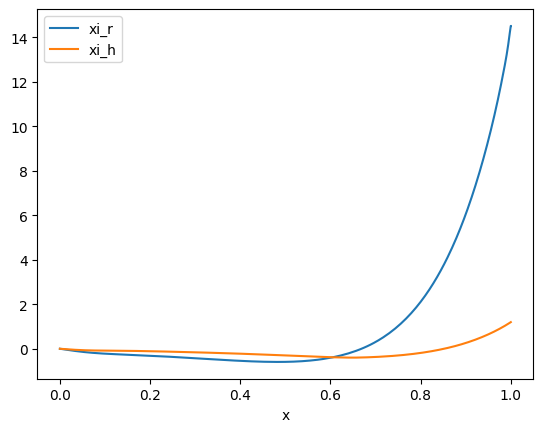

In [29]:

plt.figure()

plt.plot(d['x'], d['xi_r'].real, label='xi_r')
plt.plot(d['x'], d['xi_h'].real, label='xi_h')

plt.xlabel('x')

plt.legend()

/tmp/ipykernel_3506459/2715802805.py:11: RuntimeWarning: divide by zero encountered in divide
  d['Sl2'] = l*(l+1)*Gamma_1/(V*c_1)


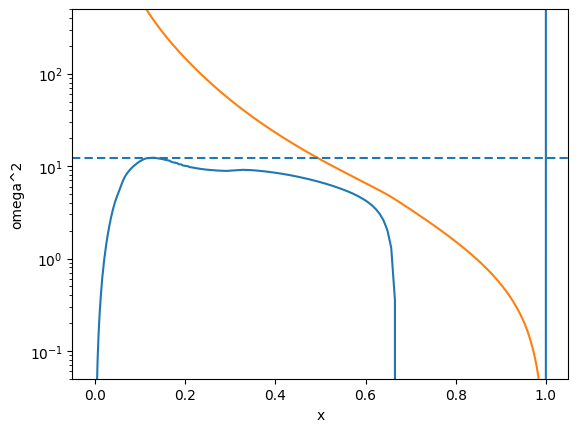

In [30]:
l = d.meta['l']
omega = d.meta['omega']

x = d['x']
V = d['V_2']*d['x']**2
As = d['As']
c_1 = d['c_1']
Gamma_1 = d['Gamma_1']

d['N2'] = d['As']/d['c_1']
d['Sl2'] = l*(l+1)*Gamma_1/(V*c_1)

# Plot the propagation diagram

plt.figure()

plt.plot(d['x'], d['N2'], label='N^2')
plt.plot(d['x'], d['Sl2'], label='S_l^2')

plt.axhline(omega.real**2, dashes=(4,2))

plt.xlabel('x')
plt.ylabel('omega^2')

plt.ylim(5e-2, 5e2)
plt.yscale('log')

In [31]:
D_overlap = np.trapz(rho_Dles *( d['x']**3 * d['xi_r'] + 3 * d['x']**2 * (d['x'] * d['xi_h'])),d['x']) / M_Dles

In [32]:
N_overlap= np.trapz(rho_Dles *( d['x']**2 * d['xi_r']**2 + 6 * (d['x'] * d['xi_h'])**2 ),d['x']) / M_Dles

In [33]:
D_overlap **2 / N_overlap

(0.005167303310685361-0j)